# Maximum Likelihood Estimation (MLE)

## Learning objectives
- Understand mathematically, what it means to find "optimal" parameters
- Derive MLE from scratch
- Quantify the confidence in a particular parameterisation
- Understand why we use the mean squared error loss function for regression tasks rather than say the absolute or quartic squared error

## Intro

The maximum likelihood parameters are those which parameterise a distribution for which the largest value of the PDF is at the true label for an example.

$\theta_{ML} = {argmax}_{\theta} \ p(X; \theta)$

$=argmax_{\theta} \ \Pi_{i=1}^{m} \ p(x; \theta)$

$=argmax_{\theta} \ \ $

# draw MLE for p(x)


In [1]:
# DON'T WORRY ABOUT THIS CELL, IT JUST SETS SOME STUFF UP
import numpy as np
import matplotlib.pyplot as plt

def get_data():
    data = np.genfromtxt('DATA/winequality-red.csv', delimiter=';') ## Import income data and save to variable.
    data = data[1:] # remove NaNs
    X = data[:, :-1] # get all of the rows and all but the last column (the last column is the labels)
    X = X[:, 0] # just use first feature
    Y = data[:, -1] # get the last column as the labels
    return X, Y

def plot_data(X, Y):
    plt.figure()
    plt.scatter(X, Y, c='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

X, Y = get_data()
# plot_data(X, Y)

# plt.scatter(X, np.zeros(X.shape[0]), c='r')
# plt.xlim(0, 100)
# plt.ylim(-0.2, 0.5)
# plt.show()

mu = np.mean(X)
sigma = np.std(X)
print(sigma)


15.387511501346852


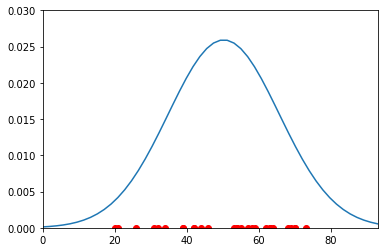

In [2]:
import numpy as np

class GaussianPDF:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        p_x = np.exp(-(x - self.mu)**2 / (2*self.sigma**2)) / ( np.sqrt(2*np.pi) * self.sigma) # pdf equation for gaussian
        return p_x

p = GaussianPDF(mu, sigma)

p(0)
domain = np.linspace(min(X)-20, max(X)+20)
plt.plot(domain, p(domain))
plt.scatter(X, np.zeros(X.shape[0]), c='r')
plt.ylim(0, 0.03)
plt.xlim(min(domain), max(domain))
plt.show()

What is the central position (mean) of the Gaussian which best describes the feature values of the data, assuming that they are normally distributed?

Let's test out different positions of the gaussian and calculate the probability of 

Which of these distributions would you be most likely to sample the dataset feature values from? We can calculate this by 

In [3]:

mus = np.arange(100)
best_mu = 0
best_val = -float('inf') # initialise best value as infinitely bad
for m in mus:
    p = GaussianPDF(m, sigma)
    obj = 0
    for x in X:
        obj += np.log(p(x))
    if obj > best_val:
        best_val = obj
        best_mu = m
    print(obj)

print('BEST VAL:', best_val)
print('BEST MU:', best_mu)


-265.78338577017564
-259.89595256900344
-254.1267748410254
-248.47585258624173
-242.9431858046524
-237.52877449625728
-232.23261866105645
-227.05471829904988
-221.9950734102376
-217.05368399461963
-212.23055005219587
-207.52567158296645
-202.93904858693128
-198.47068106409043
-194.12056901444384
-189.88871243799142
-185.77511133473342
-181.77976570466961
-177.9026755478001
-174.14384086412488
-170.5032616536439
-166.98093791635725
-163.5768696522649
-160.2910568613667
-157.1234995436629
-154.07419769915327
-151.14315132783804
-148.33036042971705
-145.63582500479026
-143.05954505305778
-140.6015205745196
-138.26175156917574
-136.04023803702614
-133.93697997807078
-131.9519773923097
-130.08523027974286
-128.33673864037033
-126.70650247419206
-125.19452178120812
-123.80079656141848
-122.52532681482303
-121.36811254142188
-120.32915374121504
-119.40845041420242
-118.60600256038416
-117.92181017976012
-117.35587327233036
-116.9081918380949
-116.57876587705368
-116.36759538920677
-116.274680

## Now let's look at the supervised case

# $P(Y|X;\theta)$


Previously we implemented a linear regression algorithm that made a point estimate of the label $y$ given an input $x$.
We chose to minimise the mean squared error somewhat arbitrarily. Why did we choose this as our criterion? Why not minimise the absolute error or the mean quartic error?

Let's revisit the linear regression algorithm from a perspective of maximum likelihood.
Rather than predicting a point estimate, we now have the model predict a conditional probability distribution $p(y|x;\theta)$ over the label $y$ given $x$.
That means that our model is predicting the confidence of the label taking one of a range of possible values, rather than predicting the exact value, for each example input.

To yield the same linear regression learning algorithm, we assume that the distribution over labels for a given example is a Gaussian.
# Is this because of the central limit theorem?

# This is our first encounter with injecting prior knowledge (or an assumption) about the distribution of the data into our model.

['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
14


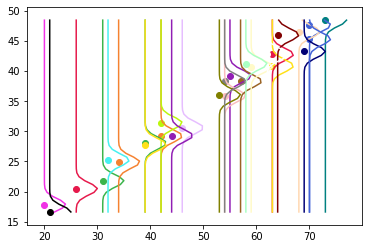

In [7]:
from get_colors import colors
print(colors)

print(int(X.shape[0]/2))
X_few = [X[0], X[22], X[-1]]
Y_few = [Y[0], Y[22], Y[-1]]


# plot_data(X, Y)
# plot_data(X_few, Y_few)
# plt.scatter(X_few, Y_few, c='r')
# for i in range(len(X_few)):
#     x = X_few[i]
#     y = Y_few[i]
for i in range(len(X)):
    x = X[i]
    y = Y[i]
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 1)
    p_plot = 10*p(domain) + x
    plt.scatter(x, y, c=colors[i%len(colors)])
    plt.plot(p_plot, domain, c=colors[i%len(colors)])
    # p_y_given_x = 
plt.show()


So for every input, we are going to have our model output a distribution, rather than a point estimate. How can we do this? Simply by having the output of our model be the parameterisation for a gaussian distribution over the values of the label. In this case we will assume that the variance of these distributions is fixed; it will not affect the argmax of the distribution anyway.